In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import copy
# import xlsxwriter
from datetime import date

In [3]:
april = pd.read_csv('9 APRIL.csv')

ParserError: Error tokenizing data. C error: Expected 8 fields in line 19, saw 16


In [ ]:
entri_ = df[df['Proses Terakhir'] == 'ENTRI VERIFIED']
entri = entri_.groupby(['Pelanggan', 'Tanggal', 'Proses Terakhir'])[['awb']].count()
entri.at['Total'] = entri['awb'].sum(axis = 0)
entri
# entri['awb'].sum(axis=0)
# entri_.shape

# TARIK FX

USE UMUM0684
COPY TO D:\FX0684 FIELDS BARC_,NAMA, STATUS,JONGOS,TELEPON3,REPORT4 TYPE CSV


# coret coret

In [ ]:
for i in range(0,5):
    print(i,'i')
    for j in range(0, i):
        print('tes',j)

# =============================================

#  Aplikasi MEGA

In [7]:
# PUT AWB DIRECTLY
apl = pd.DataFrame([

""
    
 ], columns = ['awb'])


apl

,awb
0,CGK8057369200179


In [12]:
# PUT AWB FROM EXCEL FILE ==> apl.xls

apl = pd.read_excel('apl.xlsx')
# apl.shape



# Merging data file with POD coresys
# Merge Tanggal in String Format to make it good form in excel file
result = pd.merge(apl,df[['awb', 'Penerima', 'Tlp1', 'No. Referensi', 'Tanggal', 'Tujuan', 'Instruksi Khusus', 'Diterima Oleh', 'Status', 'Status Penerima']],
        on='awb', how='left')
result['Status Penerima dan Penerima']  = result['Status']+ ': ' + result['Diterima Oleh'] + ' sebagai: ' + result['Status Penerima'] 
# result.rename(columns={'Instruksi Khusus' : 'KTP'}, inplace=True)

result = result[['awb', 'Penerima' ,'Status Penerima dan Penerima', 'Tlp1', 'No. Referensi', 'Tanggal', 'Tujuan', 'Instruksi Khusus', 'Diterima Oleh', 'Status', 'Status Penerima']]

result['KTP'] = '';
#result = result.sort_values('Penerima', ascending=True)
result.rename(columns = {'Tlp1' : 'Fin acc'}, inplace=True)
result.to_excel('apl2 cek.xlsx', index=False)
print(result.shape)
result.head(3)


# https://stackoverflow.com/questions/45103927/appending-rows-in-excel-xlswriter

(7, 12)


,awb,Penerima,Status Penerima dan Penerima,Fin acc,No. Referensi,Tanggal,Tujuan,Instruksi Khusus,Diterima Oleh,Status,Status Penerima,KTP
0,CGK8055357100224,LIE KIAN,DITERIMA OLEH: LIE KIAN sebagai: PENERIMA LANG...,014167572,41675726022804,2021-04-29,PONTIANAK,APL,LIE KIAN,DITERIMA OLEH,PENERIMA LANGSUNG,
1,CGK8057163705579,YOHANES,DITERIMA OLEH: YOHANES sebagai: PENERIMA LANGSUNG,014232421,42324219812405,2021-05-25,SINTANG,APL,YOHANES,DITERIMA OLEH,PENERIMA LANGSUNG,
2,CGK8057289605539,TB ARIEF ISKANDAR,DITERIMA OLEH: ARIEF sebagai: PENERIMA LANGSUNG,014236481,42364814902505,2021-05-27,MALANG,APL,ARIEF,DITERIMA OLEH,PENERIMA LANGSUNG,


In [61]:
dg = pd.DataFrame({'A':[1,2,3], 'B':[4,5,6], 'C':[7,8,9]})

with open('out.csv', 'w') as fp:
    fp.write('\n'*1)
    dg.to_csv(fp, index=False)

In [30]:
import xlsxwriter as xw
from openpyxl import load_workbook

In [22]:
workbook = xlsxwriter.Workbook('apl2.xlsx')
worksheet = workbook.add_worksheet()
worksheet


In [ ]:
fx['Bulan'] = fx['tgl_pkp'].str.slice(3,5)

# PARSING WILAYAH TLC 

In [ ]:
nos = pd.read_csv('TLC SAP.csv')

# DATA KU DARI PRE RETURN

In [ ]:
path_pre_return = r'D:\PRE RETURN  2020'
file_pre_ret=r'PRE RETURN KK.xls'
meg = pd.read_excel(os.path.join(path_pre_return, file_pre_ret), dtype={'Tlp1': str, 'H': str, 'C': str, 'mobile':str, 'TLP C':str,'No. Referensi':str, 'KODE POS':str})

meg.fillna('/', inplace=True)

# note convert to "str" will automatically change empty cell to be "nan"
meg = meg.astype(str)
def strips(to):
    x = to.str.strip()
    return(x)



meg = meg.apply(strips)

meg['ALAMAT UPDATE'] = meg['Company name'] + '/' + meg['ADDRES 1']+' ' +meg['ADDRES 2']+' '+meg['ADDRES 3']+' '+meg['ADDRES 4']+' '+meg['ADDRES 5']+' '+meg['KODE POS']+' '+meg['C']+' '+meg['mobile']+' '+meg['Ket']
meg['TELP BARU'] = meg['H'] +'/'+ meg['C'] +'/' + meg['mobile']
meg.to_excel(os.path.join(path_pre_return, 'PRE RETURN KK 2608_FINAL.xlsx'))


In [ ]:
def strips(meg):
    for i in meg:
        meg[i].str.strip()
        return(meg)
    
strips(meg)

# Parsing Data C0resys

In [2]:
# IMPORT FILESSS

# POD CORESYS

# import os
import glob

path = r'C:\Users\kartu\Downloads\all client'
# path = r'C:\Users\kartu\Downloads\POD 2020'
file = glob.glob(os.path.join(path,"*.csv"))

for target in file:
    pod = pd.concat((pd.read_csv(f, dtype={'Tlp1':str, 'No. Referensi': str}, encoding='utf-8', low_memory=False) for f in file))

In [3]:
pod['Pelanggan'].value_counts().index.to_list()

['CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)',
 'CGK000504 - BANK MEGA KARTU KREDIT (ONLINE APLIKASI)',
 'MEGA18 - MAKASSAR']

In [9]:
import os
p = r'C:\Users\kartu\Downloads\all client'
x = [f for f in os.listdir(p)]
x

['1 jan',
 '2 feb',
 '3 mar',
 '4 apr',
 'cekaplfraud',
 'FINAL DATA',
 'REG MEGA 2202.pdf',
 'users_20210119_1 1284.cs',
 'users_20210225_1 JAN.cs',
 'users_20210323_1 feb.cs',
 'users_20210419_1 apr.cs',
 'users_20210419_1 apr.csv',
 'users_20210419_1 mar.cs']

In [5]:
pod['Pelanggan'].unique()

array(['CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)',
       'CGK000504 - BANK MEGA KARTU KREDIT (ONLINE APLIKASI)'],
      dtype=object)

In [3]:
# import copy
df = copy.copy(pod)

df.rename(columns = {' "No. AWB"': 'awb'}, inplace=True)
df['No. Referensi']  = df['No. Referensi'].str.replace('#', '')
df['awb']  = df['awb'].str.replace('#', '')
df['Status POD'].fillna('ON PROSES', inplace=True)
dt=['0000-00-00']
df = df[~df['Tanggal Terima'].isin(dt)]
df['Status'].fillna('NO Status', inplace=True)

df['filter_cmi'] = df['No. Incoming'].str.slice(0,6)

df['filter_cmo'] = df['No. Manifest Outgoing'].str.slice(0,6)

df.shape
# nos = pd.read_csv('TLC SAP.csv')

# MEGA Client_sap
df.loc[df['Pelanggan']== 'CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)', 'Client_sap'] = 'MEGA'
df.loc[df['Pelanggan']== 'CGK000504 - BANK MEGA KARTU KREDIT (ONLINE APLIKASI)', 'Client_sap'] = 'MEGA'
df.loc[df['Pelanggan']== 'MEGA18 - BANDUNG', 'Client_sap'] = 'MEGA'
# df.loc[df['Pelanggan']== '', 'Client_sap'] = 'MEGA'

# Bukopin Client_sap
df.loc[df['Pelanggan']== 'CGK018645-MITRA USAHA SARANA TRANSPORTASI PT (KK)', 'Client_sap'] = 'BUKOPIN'
df.loc[df['Pelanggan']== 'CGK018645 - MITRA USAHA SARANA TRANSPORTASI PT (KK)', 'Client_sap'] = 'BUKOPIN'

# PANIN
df.loc[df['Pelanggan']== 'CGKN04622 - PANIN  ( KARTU KREDIT)', 'Client_sap'] = 'PANIN'
df.loc[df['Pelanggan']== 'CGKN04249 - PANIN ( KIRIM ULANG )', 'Client_sap'] = 'PANIN'
df.loc[df['Pelanggan']== 'CGKN04622-PANIN  ( KARTU KREDIT)', 'Client_sap'] = 'PANIN'
df.loc[df['Pelanggan']== 'CGKN04249-PANIN ( KIRIM ULANG )', 'Client_sap'] = 'PANIN'

# NIAGA

df.loc[df['Pelanggan']== 'CGKN03064 - CIMB NIAGA  ( KARTU KREDIT)', 'Client_sap'] = 'NIAGA'




In [5]:
df.shape

(11894, 53)

## ADD New Keterangan KK 13 Jan

=+ Please README

 - catatan: Selalu Filter Status POD UNDELIVERED dan ALT2 dari paling KANAN, karena yg kiri akan selalu UNDELIVERED dan ketahuan prosesnya
 
 - Harus tarik tiap hari
 
 - Selalu COPY field TANGGAL ke FIELD TANGGAL paling KIRI!!! agar filternya enak(opsional)
 
 - Filter STATUS POD dari TANGGAL, jadi lebih spesifik karena ada cell yang hilang
 
 - Transport dan Filter Undelivered untuk lihat perbedaan Keterangan ALasan
 
 - Cara setting KET: alasan 1&2 sideByside: 
 - 1. filter last ALT2 in the last columns
 - 2. filter last NON-ALT2 in the second last newest date columns

In [8]:
# file name tanggal hari ini
file = r'users_20210119_1 0184.csv'

# read from and save to 
pathDir = r'C:\Users\kartu\Downloads\all client\jan'

dbx = pd.read_csv(os.path.join(pathDir, file), dtype={'Tlp1': str, 'No. Referensi':str})

# pre process

import copy
db = copy.copy(dbx)

db.rename(columns = {' "No. AWB"': 'awb'}, inplace=True)
db['No. Referensi']  = db['No. Referensi'].str.replace('#', '')
db['awb']  = db['awb'].str.replace('#', '')
db['Status POD'].fillna('ON PROSES', inplace=True)
# db = db[~db['Tanggal Terima'].isin(dt)]
db['Status'].fillna('NO Status', inplace=True)

db['filter_cmi'] = db['No. Incoming'].str.slice(0,6)

db['filter_cmo'] = db['No. Manifest Outgoing'].str.slice(0,6)

db['Today'] = pd.to_datetime('now')
db['Today'] = db['Today'].astype('datetime64[D]')
db['Tanggal Terima'] =  db['Tanggal Terima'].astype('datetime64[D]')
db['Tanggal'] = db['Tanggal'].astype('datetime64[D]')
db['Tgl. Incoming'] = db['Tgl. Incoming'].astype('datetime64[D]')
db['Tgl. Proses Terakhir'] = db['Tgl. Proses Terakhir'].astype('datetime64[ns]')
db['Proses Akhir'] = db['Tgl. Proses Terakhir'].astype(str)
db['Tgl. Manifest Outgoing'] = db['Tgl. Manifest Outgoing'].astype('datetime64[D]')
db['Tgl. Delivery'] = db['Tgl. Delivery'].astype('datetime64[D]')
db['Tanggal Terima'] = db['Tanggal Terima'].astype('datetime64[D]')
db['Bulan'] = db['Tanggal'].dt.strftime('%B')
db['BulanInt'] = db['Tanggal'].dt.strftime('%m')

#=== == === == === == =   ==== === = = = =  = = =  = = = = = = = = = = = = = =
# filter to specific columns
dbfilter = db[['awb','No. Referensi', 'Tanggal', 'TLC Tujuan', 'Tgl. Proses Terakhir', 'Status POD', 'Status', 'Keterangan', 'Kurir', 'Tgl. Incoming', 'Tgl. Delivery', 'Keterangan Outgoing']]


# adding specific date to columns
cek = dbfilter.columns
cek = cek.to_list()

today = str(date.today())[8:10]
# today = today
tes = [e + '_' + today for e in cek]

# tes = [e + '_' + '18' for e in cek]


dbfilter.columns = tes

# replace awb field
dbfilter.rename(columns={dbfilter.columns[0]:'awb'}, inplace=True)

# save output to CSV
# dbfilter.to_csv(os.path.join(pathDir, file), index=False)

#=== == === == === == =   ==== === = = = =  = = =  = = = = = = = = = = = = = =

# save output to XLSX
# db.head(3).to_excel(os.path.join(pathDir, 'filexxx.xlsx'))


In [9]:
dbfilter.shape

(7123, 12)

## Merging with Final

In [10]:
# parse data FINAL
finalDoc_row = r'Final_test.csv' # diTIBAN terus
pathFinalDoc = r'C:\Users\kartu\Downloads\all client\FINAL DATA'

dataFinal = pd.read_csv(os.path.join(pathFinalDoc, finalDoc_row), dtype={'Tlp1': str, 'No. Referensi':str})

# merging file FINAL with dbfilter

# harus set Outer : agar mengupdate awb baru yang ditanggal sebelumnya tidak ada
finalCheck = pd.merge(dataFinal, dbfilter, on='awb', how='outer')


# save file in other directory
finalDesti = r'C:\Users\kartu\Downloads\all client\FINAL DATA'

# cookedFIle: last output for analysist
cookedFile = r'Final_test.csv'
finalCheck.to_csv(os.path.join(finalDesti, cookedFile), index=False)



## PROJECT BARU DETECT KETERANGAN ==============

In [57]:
# pro = df[df['Status'] != 'DELIVERED']


# pro['comp'] = pro['awb'] + '__' + pro['TLC Tujuan'] + '__' + pro['Status'] +'__'+pro['Keterangan']
# iterate value

retoday = pd.read_excel('ret.xlsx')
cek = retoday['awb'].astype(str).to_list()


# cek = pro['awb'].astype(str).to_list()

store = []
awb_list = []
tlc = []
count =1
t = type('1234567890')
for i,value in enumerate(cek):
#     if (' ALAMAT KE 2 ' in value or ' 2 ' in value or 'KEDUA' in value or ' KE 2 ' in value or 'MINTA' in value):
    if ( in value:
        
        # slicing value awb
        awb_list.append((value[0:16]))
        # slicing value keterangan
        store.append((i, (value[22:len(value)])))
#         slicing TLC Tujuan
        tlc.append((value[18:22]))
#         print value
        print(count, ':', i, (value[22:len(value)]))
        
        count+=1

                          

1 : 32 CGK8045837400339__CH RESIGN INFO SARAS SATPAM
2 : 481 CGK8045853704484__RUMAH KOSONG
3 : 779 CGK8045890600246__RUMAH KOSONG TDK DI HUNI INFO SATPAM KOMPLEK
4 : 839 CGK8045936600200__RUMAH KOSONG TIDAK ADA ORANG
5 : 884 CGK8045936600655__RUMAH SLALU KOSONG GK PERNAH ADA ORANG UDA 3 X KIRIM
6 : 922 CGK8045936601039__RMH KOSONG
7 : 1172 CGK8046041101655__RUMAH KOSONG,DIPANGGIL TDK KELUAR
8 : 1340 CGK8046125200179__RUMAH KOSONG
9 : 1342 CGK8046125200191__RUMAH KOSONG
10 : 1353 CGK8046125200300__KOSONG
11 : 1485 CGK8046125201624__RUMAH KOSONG, AU 11-1
12 : 1526 CGK8046125202039__2X KUNJUNGAN RMH KOSONG
13 : 1635 CGK8046210100539__RUMAH KOSONG DIHUNI
14 : 1789 CGK8046245201446__RUMAH KOSONG
15 : 1873 CGK8046245202284__RUMAH KOSONG
16 : 1891 CGK8046245202466__RMH KOSONG TDK ADA ORG
17 : 1904 CGK8046245202591__RUMAH KOSONG
18 : 2006 CGK8046245203611__RMH CH KOSONG
19 : 2127 CGK8046245204824__RUMAH KOSONG
20 : 2856 CGK8043693200079__RUMAH KOSONG TIDAK DI HUNI
21 : 3077 CGK8043693202284__

In [ ]:
# d = {'col1': [1, 2], 'col2': [3, 4]}

# df = pd.DataFrame(data=d)
d = {'awb': awb_list, 'tlc': tlc, 'Result':store}
testdf = pd.DataFrame(data=d)
testdf.to_excel('testdfX alt 2.xlsx')

https://stackoverflow.com/questions/44590646/iterating-through-a-dataframe-to-create-pdf-documents

## PROJECT BARU DETECT ALAMAT ==============

NameError: name 'length' is not defined

## Cek Entry

In [5]:
df.groupby(['Tanggal', 'Pelanggan', 'Proses Terakhir'])[['awb']].count().unstack() #.to_excel('entry.xlsx')

awb  \
Proses Terakhir                                               DELIVERY    
Tanggal    Pelanggan                                                      
2020-12-01 CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)          NaN   
2020-12-02 CGK000504 - BANK MEGA KARTU KREDIT (ONLINE APLI...       NaN   
           CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)          1.0   
2020-12-03 CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)          1.0   
2020-12-04 CGK000504 - BANK MEGA KARTU KREDIT (ONLINE APLI...       NaN   
           CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)          NaN   
2020-12-07 CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)          NaN   
2020-12-08 CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)          2.0   
2020-12-10 CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)          3.0   
2020-12-11 CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)         12.0   
2020-12-14 CGK000504 - BANK MEGA KARTU KREDIT (ONLINE APLI...       NaN   
           CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)          3.0   
2020-12-15 CGK000504 - BANK MEGA KARTU KREDIT (ONLINE APLI...       NaN   
           CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)          3.0   
2020-12-16 CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)          9.0   
2020-12-17 CGK000504 - BANK MEGA KARTU KREDIT (ONLINE APLI...       NaN   
           CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)         11.0   
2020-12-18 CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)         23.0   
2020-12-21 CGK000504 - BANK MEGA KARTU KREDIT (ONLINE APLI...       1.0   
           CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)         75.0   
2020-12-22 CGK000504 - BANK MEGA KARTU KREDIT (ONLINE APLI...       NaN   
           CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)         71.0   

                                                                               \
Proses Terakhir                                               DELIVERY RETURN   
Tanggal    Pelanggan                                                            
2020-12-01 CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)               25.0   
2020-12-02 CGK000504 - BANK MEGA KARTU KREDIT (ONLINE APLI...             NaN   
           CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)               44.0   
2020-12-03 CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)               14.0   
2020-12-04 CGK000504 - BANK MEGA KARTU KREDIT (ONLINE APLI...             NaN   
           CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)               11.0   
2020-12-07 CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)               17.0   
2020-12-08 CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)               24.0   
2020-12-10 CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)               41.0   
2020-12-11 CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)               19.0   
2020-12-14 CGK000504 - BANK MEGA KARTU KREDIT (ONLINE APLI...             NaN   
           CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)                1.0   
2020-12-15 CGK000504 - BANK MEGA KARTU KREDIT (ONLINE APLI...             NaN   
           CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)                NaN   
2020-12-16 CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)                NaN   
2020-12-17 CGK000504 - BANK MEGA KARTU KREDIT (ONLINE APLI...             NaN   
           CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)                NaN   
2020-12-18 CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)                NaN   
2020-12-21 CGK000504 - BANK MEGA KARTU KREDIT (ONLINE APLI...             NaN   
           CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)                NaN   
2020-12-22 CGK000504 - BANK MEGA KARTU KREDIT (ONLINE APLI...             NaN   
           CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)                NaN   

                                                                        \
Proses Terakhir                                               INCOMING   
Tanggal    Pelangg

In [13]:
df[df['Proses Terakhir']=='ENTRI VERIFIED'].to_excel('awb entry.xlsx')

## FILTER REGEX ALT2

In [37]:
df['new'] = np.where(df['Keterangan Outgoing'].str.contains('[A][L][T]'), "A2","NORMAL")

In [38]:
df['new'].value_counts()

NORMAL    7848
A2         131
Name: new, dtype: int64

In [39]:
df[['new', 'awb', 'Keterangan Outgoing']].to_excel('xlxl.xlsx')

In [ ]:
df[df['Proses Terakhir']=='INCOMING'].to_excel('cekincoming.xlsx')

In [28]:
df['No. Referensi'].head

<bound method NDFrame.head of 0             14784152660110
1             05329633110110
2             08519758720110
3             03306126050110
4             19139349810110
                ...         
4296    202001080000621I3603
4297    202001090002400I0523
4298    202001100000570I0828
4299    202006100000001N0005
4300    202001090002869I0711
Name: No. Referensi, Length: 42008, dtype: object>

In [ ]:
df = pd.merge(df, nos[['TLC Tujuan', 'Regional NOS']], on='TLC Tujuan', how='inner')


In [ ]:
https://stackoverflow.com/questions/53645882/pandas-merging-101

df = df.merge(nos[['TLC Tujuan', 'Regional NOS']], on='TLC Tujuan', how='inner')

#  REPLACE VALUE BASED ON ANOTHER VALUE

In [ ]:
df['Pelanggan'].unique()

In [ ]:
df['Pelanggan'].value_counts().sum(axis=0)

In [ ]:
df['Client_sap'].value_counts()

# CEK MISRUT

In [ ]:
misrut = pd.merge(fx[['awb', 'status', 'nama', 'noresi', 'tgl_pkp', 'ALAMAT 2']], df[['awb', 'Tlp1', 'No. Referensi', 'Tanggal', 'TLC Tujuan', 'Alamat Penerima', 'Penerima', 'Status POD', 'Proses Terakhir', 'Tgl. Proses Terakhir', 'Status', 'Keterangan']], 
              on = 'awb', how='inner')
misrut = misrut[['awb', 'noresi', 'Tlp1', 'No. Referensi','TLC Tujuan', 'Tanggal', 'status', 'nama','Alamat Penerima', 'ALAMAT 2','Penerima', 'Status POD', 'Proses Terakhir','Tgl. Proses Terakhir', 'Status', 'Keterangan']]
t = ['T', 'B']
pa = ['INCOMING RETURN', 'INCOMING', 'POD', 'OUTGOING RETURN']
st = ['MISSROUTE']
miss = misrut[~misrut['status'].isin(t) &
          misrut['Proses Terakhir'].isin(pa)&
             misrut['Status'].isin(st)]
# GANTI TGL TERBARU incomind diatas tgl kemaren
miss.to_excel('Cekmisroute 2108.xlsx')

# ALAMAT 2 INCOMING RETURN

In [ ]:
tes = pd.merge(fx[['awb', 'status', 'nama', 'noresi', 'tgl_pkp','telepon3', 'ALAMAT 2']], df[['awb', 'Tlp1', 'Pelanggan', 'No. Referensi', 'Tanggal', 'TLC Tujuan', 'Alamat Penerima', 'Penerima', 'Status POD', 'Proses Terakhir', 'Keterangan Outgoing','Tgl. Proses Terakhir', 'Status', 'Keterangan']], 
              on = 'awb', how='inner')
tes = tes[['awb', 'Pelanggan', 'noresi', 'Tlp1', 'No. Referensi','TLC Tujuan', 'Tanggal', 'status', 'nama','Alamat Penerima', 'ALAMAT 2','Penerima', 'Status POD', 'Proses Terakhir','Tgl. Proses Terakhir','Keterangan Outgoing', 'Status', 'Keterangan', 'telepon3']]
t = ['T', 'B']
pa = ['INCOMING RETURN', 'INCOMING', 'OUTGOING RETURN']
tes_ = tes[~tes['status'].isin(t) &
          tes['Proses Terakhir'].isin(pa)]
# GANTI TGL TERBARU incomind diatas tgl kemaren

# tes_=tes_[tes_['Tgl. Proses Terakhir'] > pd.Timestamp(2020,7,19)]

with pd.ExcelWriter('PRE RETURN KK 1408_.xlsx') as writer:
    for sort, data in tes_.groupby('Proses Terakhir'):
        data.to_excel(writer, sheet_name=sort)

In [ ]:
df['Pelanggan'].value_counts()

# CEK INCOMING RETURN ALL

In [8]:
tes = pd.merge(fx[['awb', 'status', 'nama', 'noresi', 'tgl_pkp', 'telepon3','ALAMAT 2']], df[['awb','Client_sap','Bulan','Pelanggan', 'Tlp1', 'No. Referensi', 'Tanggal', 'TLC Tujuan', 'Alamat Penerima', 'Penerima', 'Status POD','Kurir', 'Proses Terakhir', 'Tgl. Proses Terakhir', 'Status', 'Keterangan']], 
              on = 'awb', how='inner')
tes = tes[['awb','Bulan', 'noresi','Pelanggan', 'Tlp1', 'No. Referensi','TLC Tujuan', 'Tanggal', 'status', 'nama','Alamat Penerima', 'ALAMAT 2','Penerima', 'Status POD', 'Proses Terakhir','Tgl. Proses Terakhir', 'Status', 'Kurir', 'Keterangan']]
t = ['B', 'T']
#cl = ['CGK018645 - MITRA USAHA SARANA TRANSPORTASI PT (KK)',
     #'CGK018645-MITRA USAHA SARANA TRANSPORTASI PT (KK)']
# tes['Pelanggan'].isin(cl)
pa = ['INCOMING RETURN'] # 'POD', 'INCOMING', 'DELIVERY RETURN'
# tes['Proses Terakhir'].isin(pa)
tes_ = tes[~tes['status'].isin(t)&
          tes['Proses Terakhir'].isin(pa)]# GANTI TGL TERBARU incomind diatas tgl kemaren

#es_=tes_[tes_['Tgl. Proses Terakhir'] > pd.Timestamp(2020,7,17)]

tes_.to_excel('INCOMING RETURN 16 NOV AUG.xlsx')
tes_.shape

(16360, 19)

# Cek Outgoing Return

In [6]:
out_ret = df[df['Proses Terakhir']== "INCOMING"][['awb', 'Service','Pelanggan','TLC Tujuan','Tanggal', 'Penerima','Status POD', 'Proses Terakhir', 'Tgl. Proses Terakhir', 'Proses Akhir']]

# filter_ot = ['OU']

out_ret.to_excel('INCOMING.xlsx')
# out_ret.to_excel('manifest outgoing.xlsx')

In [7]:
out_ret.shape

(51, 10)

In [8]:
df['Proses Terakhir'].value_counts()

OUTGOING RETURN      6621
POD                  4306
DELIVERY RETURN       465
INCOMING RETURN       225
DELIVERY              135
INCOMING               38
MANIFEST OUTGOING      17
SHIPMENT LOST           3
Name: Proses Terakhir, dtype: int64

# Generate Barcode

## Source Barcode

In [ ]:
cekx = pd.read_excel('ret.xlsx')

# cekx = pd.merge(cekx, df[['awb', 'Tlp1', 'Tanggal', 'Penerima', 'Status', 'TLC Tujuan', 'No. Referensi', 'Keterangan', 'Alamat Penerima', 'Proses Terakhir', 'Tgl. Proses Terakhir']],
#                  on = 'awb', how='left')
# cekx.to_excel('retxx.xlsx')
print(cekx.shape)
cekx.head(2)

# for barcode
addawb = cekx['awb'].to_list()
len(addawb)

## Fix

In [21]:
import copy
from reportlab.graphics.barcode import code39
from reportlab.lib.pagesizes import A4
from reportlab.lib.units import mm
from reportlab.pdfgen import canvas

c = canvas.Canvas("barcode_example39_05Mei.pdf", pagesize=A4)

code_list = copy.copy(addawb)


x = -2 * mm
y =  290 * mm #278,499 good jarak dengan space atas bawah
x1 = 5 * mm #6.4 , 
x2 = 15 * mm #15


for i, code in enumerate(code_list):
    barcode = code39.Extended39(code, barWidth=0.19*mm, barHeight=5*mm, checksum=0)

    if i % 2 == 0: # 2,
        barcode.drawOn(c, x, y) # input data to pdf [barcode, kolom 1]
        x1 = x + 5 * mm
        c.drawString(x1, y - 3 * mm, code) #3.5 good, 5 #jarak no barcode dan barcode
       
        
    else:
        x1 = x + 70 * mm #100  # space tengah 70 pas
        x2 = x1 + 70 * mm
        barcode.drawOn(c, x1, y) # input data to pdf [barcode, kolom 2, kolom 3]
        barcode.drawOn(c, x2, y)
        y = y - 13 * mm #3, 5:14, 7:12, -10:+3 # Spasi antar row BAR
        c.drawString(x1 + 5 * mm, y, code) #6.4 #jarak no barcode dan barcode
        c.drawString(x2 + 15 * mm, y, code) #jarak no barcode dan barcode
        y = y + 3 * mm #16 good,25 # Spasi antar Bar dan NO. Barcode


#    if int(y) == 0:
#        x = x + 50 * mm
#        y = 285 * mm

c.showPage()
c.save()

NameError: name 'addawb' is not defined

## Basic

In [ ]:
import copy
from reportlab.graphics.barcode import code39
from reportlab.lib.pagesizes import A4
from reportlab.lib.units import mm
from reportlab.pdfgen import canvas

c = canvas.Canvas("barcode_example39_tgr54.pdf", pagesize=A4)

code_list = copy.copy(addawb)


x = -2 * mm
y = 290 * mm #278, 
x1 = 6.4 * mm #6.4 , 

for i, code in enumerate(code_list):
    barcode = code39.Extended39(code, barWidth=0.3*mm, barHeight=5*mm)

    if i % 2 == 0: # 2,
        barcode.drawOn(c, x, y)
        x1 = x + 6.4 * mm
        c.drawString(x1, y- 5 * mm, code)
        
    else:
        x1 = x + 100 * mm
        barcode.drawOn(c, x1, y)
        y = y - 5 * mm
        c.drawString(x1 + 6.4 * mm, y, code) #6.4, 
        y = y - 25 * mm


#    if int(y) == 0:
#        x = x + 50 * mm
#        y = 285 * mm

c.showPage()
c.save()

# CEK STATUS

In [ ]:
# colouring Function

def colour(value):
    if value

In [ ]:
main = df.groupby(['Status', 'Pelanggan'])[['awb']].count().unstack()
z = main.columns
y = pd.Index([e[1] for e in z.to_list()])
main.columns = y
main.fillna(0, inplace=True)
main.drop(index='DITERIMA OLEH', inplace=True)
main.columns = ['MEGA APL', 'PANIN KU', 'PANIN NEW', 'MEGA KK']
main


In [ ]:
df[df['awb']=='CGK8034237604046'].T

# NO TEL PANIN

In [ ]:

    
# POD CORESYS

import os
import glob

path = r'J:\CS PANIN\NOMOR TELEPON\NO TELP\07'
file = glob.glob(os.path.join(path,"*.xls"))

for target in file:
    tel_panin = pd.concat((pd.read_csv(f, error_bad_lines=False) for f in file))

In [ ]:
x[x['status']=='null']

# TABRAK PRE RETURN KIRIM KE CLIENT

In [6]:
from datetime import datetime

today = str(date.today())

retoday = pd.read_excel('pre_ret.xlsx', dtype = {'Tlp1': str})

# cekret = pd.merge(retoday, df[['Tlp1', 'awb', 'Tanggal', 'Instruksi Khusus', 'Penerima', 'Status','Status POD','No. Referensi', 'TLC Tujuan', 'Keterangan', 'Alamat Penerima', 'Proses Terakhir', 'Tgl. Proses Terakhir', 'Kurir', 'Pelanggan']],
#                  on = 'Tlp1', how='left')

cekret = pd.merge(retoday, df[[ 'awb', 'Tujuan', 'Tanggal', 'Tlp1', 'Instruksi Khusus', 'Penerima', 'Status','Status POD','No. Referensi', 'TLC Tujuan', 'Keterangan', 'Alamat Penerima', 'Proses Terakhir', 'Tgl. Proses Terakhir', 'Kurir', 'Pelanggan']],
                 on = 'awb', how='left')

cekret['Status dan Keterangan'] = cekret['Status'] + ':      ' + cekret['Keterangan'] 

cekret = cekret[[ 'awb', 'Tujuan', 'Tanggal', 'Tlp1', 'Instruksi Khusus', 'Penerima','TLC Tujuan','Status', 'Status dan Keterangan', 'Proses Terakhir','Status POD','No. Referensi', 'TLC Tujuan', 'Alamat Penerima', 'Kurir', 'Pelanggan']]
cekret.rename(columns={'Tlp1':'fin acc'}, inplace=True)

cekret.to_excel('pre_ret_output_' + today + '.xlsx')
print(cekret.shape)
cekret.head(2)
# cekret

(141, 16)


,awb,Tujuan,Tanggal,fin acc,Instruksi Khusus,Penerima,TLC Tujuan,Status,Status dan Keterangan,Proses Terakhir,Status POD,No. Referensi,TLC Tujuan,Alamat Penerima,Kurir,Pelanggan
0,CGK8056267212039,PALU,2021-05-10,009586227,REN,KARTINI MUSTAPA,PLW,ALAMAT TIDAK LENGKAP,ALAMAT TIDAK LENGKAP: ALAMAT TIDAK LENGKAP,INCOMING RETURN,UNDELIVERED,95862272900405,PLW,WARUNG MAKAH ZHALDY JL RE MARTADINATA NO 1 _ _,PLWT101219230MOH RIJAL FAHRUDIN IBRAHIM,CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)
1,CGK8057369200224,MAKASSAR,2021-05-28,001134376,CRS,JEFFRY HONGADI,UPG,PINDAH,PINDAH: CH SULIT DITEMUI,INCOMING RETURN,UNDELIVERED,11343765232805,UPG,_ JL SUNGAI SADDANG BARU NO 40 RT 01/05 MARICA...,UPGT101196005SRI WAHYUDDIN R,CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)


## Message OS

In [ ]:
Selamat Pagi Tim,

Berikut Data OS Client Tarik PU tgl 1-20 May 2021: 
    CGK000504 - BANK MEGA KARTU KREDIT (ONLINE APLIKASI)
    CGK018645 - MITRA USAHA SARANA TRANSPORTASI PT (KK)
    CGKN04249 - PANIN ( KIRIM ULANG )
    CGKN04622 - PANIN  ( KARTU KREDIT)
    CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)

    
Note: *Status Kartu tersebut belum ter-report Berhasil ataupun belum dikembalikan ke Client*

Terimakasih

In [ ]:
awb_ = df[['awb', 'Tlp1', 'No. Referensi', 'Alamat Penerima','Penerima', 'Tanggal','Tgl. Manifest Outgoing', 'Tgl. Incoming' ,'Tgl. Proses Terakhir', 'TLC Tujuan', 'Pelanggan', 'Status POD', 'Proses Terakhir', 'Status','Kurir', 'Pengiriman Ke', 'Keterangan']]


In [ ]:
cekk = pd.merge(df[['awb', 'Kontak Penerima', 'No. Referensi', 'Penerima', 'Tanggal']], fx, on='awb', how='left')
cekk[['awb', 'Kontak Penerima',  'no_doc','No. Referensi', 'Penerima', 'Tanggal',
       'tgl_pkp', 'nama', 'no_kartu', 'bulan']].to_excel('cek_no_doc.xlsx')

In [ ]:
fx[fx.duplicated('no_kartu')]

In [ ]:
no_kar = df.sh

In [ ]:
fx.shape

# UBAH ALT INFO

In [ ]:
import os

# directory for data from mega
path = r"D:\Ubah Alamat"

# Put spesific name of FILE!!!
reqname = "REQUEST RUBAH ALAMAT UPDATE 12102020 KURIR SAP.xls"
alter = pd.read_excel(os.path.join(path,reqname), dtype={'Tlp1':str, 'TGL PICK UP': str, 'TGL EMAIL KE KURIR':str}, encoding = 'utf-8')
alter.columns

# alter.rename(columns = {'NO FIN ACC': 'Tlp1'}, inplace=True)


alter['ALAMAT BARU'] = alter['ALAMAT BARU'].str.replace(r'[\s]+', ' ')
# alter['TGL PICK UP'] = pd.to_datetime(alter['TGL PICK UP'])
# alter['TGL EMAIL KE KURIR'] = pd.to_datetime(alter['TGL EMAIL KE KURIR'])

# merge x coresys
alt_df = pd.merge(alter, df[['Tlp1','Alamat Penerima', 'Penerima', 'awb', 'Tanggal','Status', 'Status POD', 'Proses Terakhir', 'Tgl. Proses Terakhir']],
                 on = 'Tlp1', how='left')

alt_df = alt_df[['Tlp1','awb', 'Alamat Penerima', 'ALAMAT LAMA', 'ALAMAT BARU' , 'NAMA CH', 'Penerima', 'TGL PICK UP',
        'Tanggal', 'Status',
       'Status POD', 'Proses Terakhir', 'Tgl. Proses Terakhir', 'TGL EMAIL KE KURIR']]

# tabrak with FX
alt_df_fx = pd.merge(alt_df, fx[['awb', 'status']],
                    on = 'awb', how = 'left')

alt_df_fx['Tlp1'] = alt_df_fx['Tlp1'].astype(str)

# save to where?
dir_to = r'D:\Ubah Alamat Mega'

#name file result
fname = '12102020.xlsx'
alt_df_fx.to_excel(os.path.join(dir_to, fname))

In [ ]:
df[df['awb']=='CGK8038119501846'][['awb', 'Tlp1', 'Penerima', 'Tanggal', 'No. Referensi']]

In [ ]:
alt_df_fx

In [ ]:
path = r'D:\Ubah Alamat'
file = glob.glob(os.path.join(path,"*.xlsx"))

for target in file:
    mega_cek = pd.concat((pd.read_excel(f) for f in file))

    #name file result
fname = 'all_082020.xlsx'
alt_df_fx.to_excel(os.path.join(path, fname))

In [ ]:
df[df['awb']=='CGK8038300705584']

In [32]:
df['Pelanggan'].value_counts()

CGKN03064 - CIMB NIAGA  ( KARTU KREDIT)                                 13146
CGK018645 - MITRA USAHA SARANA TRANSPORTASI PT (KK)                      6912
TGR005066 - BANK PERMATA (KARTU KREDIT & KARTU DEBIT)                    6522
CGKN04091 - BNI  ( KARTU KREDIT)                                         3652
CGKN02395 - BANK MANDIRI ( KARTU KREDIT)                                 2061
CGK007165 - BANK DANAMON INDONESIA (KARTU KREDIT)                        2018
CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)                          1681
CGKN05094 - PT BCA (KK ISSUE)                                            1427
CGKN00796 - MAYBANK  (KARTU KREDIT)                                      1179
CGKN04622 - PANIN  ( KARTU KREDIT)                                        810
CGKN00885 - MNC                                                           658
CGK005338 - PT BANK BNI SYARIAH (KARTU KREDIT)                            652
CGKN04249 - PANIN ( KIRIM ULANG )                               

In [22]:
df['No. Referensi'].head()

0    41730492743110
1    37850682082710
2    67903501763110
3    37879580563110
4    12959390882710
Name: No. Referensi, dtype: object

In [23]:
df.columns

Index(['awb', 'TLC Asal', 'No. Referensi', 'Pelanggan', 'Tanggal', 'Tujuan',
       'TLC Tujuan', 'Tipe Transaksi', 'Service', 'Pengirim', 'Kontak',
       'Penerima', 'Alamat Penerima', 'Tlp1', 'Tlp2', 'Kontak Penerima',
       'Keterangan Barang', 'Nilai Barang', 'Instruksi Khusus', 'Berat',
       'Koli', 'No Pickup', 'Cycle', 'Tgl. Proses Terakhir', 'Proses Terakhir',
       'Status POD', 'Status', 'Diterima Oleh', 'Status Penerima',
       'Tanggal Terima', 'Jam Terima', 'Keterangan', 'Kurir', 'Posisi Kurir',
       'Jenis Kiriman', 'Tgl. Verifikasi', 'Tgl. Manifest Outgoing',
       'Tgl. Incoming', 'No. Manifest Outgoing', 'No. Incoming',
       'No. Delivery', 'Volumetric', 'Keterangan Outgoing', 'Pengiriman Ke',
       'Waktu Verifikasi', 'Tgl. Delivery', 'Diterima Di Alamat', 'Kode Kota',
       'Divisi', 'Kode Penerbangan', 'filter_cmi', 'filter_cmo', 'Client_sap',
       'Today', 'Proses Akhir', 'Bulan', 'BulanInt'],
      dtype='object')

In [25]:
retoday['Tlp1'] = retoday['Tlp1'].astype('str')
retoday['Tlp1'].head()

0    000908330
1    000910976
2    008869664
3    000899773
4    008936618
Name: Tlp1, dtype: object

# TABRAK RETURN HARI INI 

In [5]:
from datetime import datetime
today = pd.to_datetime('today').normalize()
today = str(today)

retoday = pd.read_excel('ret.xlsx', dtype = {'Tlp1': str})

# cekret = pd.merge(retoday, df[['Tlp1', 'awb', 'Tanggal', 'Instruksi Khusus', 'Penerima', 'Status','Status POD','No. Referensi', 'TLC Tujuan', 'Keterangan', 'Alamat Penerima', 'Proses Terakhir', 'Tgl. Proses Terakhir', 'Kurir', 'Pelanggan']],
#                  on = 'Tlp1', how='left')

df['St_pod_Prs_Akhir'] = df['Status POD'] + ':  ' + df['Proses Terakhir'] 

cekret = pd.merge(retoday, df[[ 'awb', 'Tanggal', 'Tlp1', 'Instruksi Khusus', 'Penerima', 'Status', 'St_pod_Prs_Akhir','Status POD','No. Referensi', 'TLC Tujuan', 'Keterangan', 'Alamat Penerima', 'Proses Terakhir', 'Tgl. Proses Terakhir', 'Kurir', 'Pelanggan']],
                 on = 'awb', how='left')


cekret.rename(columns={'awb':'BARC_', 'Status': 'JONGOS', 'Keterangan':'TELEPON'}, inplace=True)

cekret.to_excel('retxxx.xlsx')
# cekret.to_excel('CEK INCOMING MAY.xlsx')
print(cekret.shape)
cekret.head(6)
# cekret

(37, 16)


,BARC_,Tanggal,Tlp1,Instruksi Khusus,Penerima,JONGOS,St_pod_Prs_Akhir,Status POD,No. Referensi,TLC Tujuan,TELEPON,Alamat Penerima,Proses Terakhir,Tgl. Proses Terakhir,Kurir,Pelanggan
0,CGK8056267211100,2021-05-10,001311627,REN,INDRAYANI SANTOSO BAGIJO,PINDAH,UNDELIVERED: INCOMING RETURN,UNDELIVERED,13116274240405,MLG,RUMAH KOSONG TIDAK DI HUNI,_ JL LOMPO BATANG 5 RT 004/001 KARANG BESUKI S...,INCOMING RETURN,2021-05-24 09:52:55,MLGM107173478ANANG KOMARDIANTO,CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)
1,CGK8056243003239,2021-05-10,000784169,REN,INDIE AMAMI,PINDAH,UNDELIVERED: INCOMING RETURN,UNDELIVERED,07841693500405,MLG,INFO DR TETANGGA,_ JL INDAH DIENG NO 22 RT 006 RW 001 KALI SONG...,INCOMING RETURN,2021-05-24 14:32:30,MLGM101184323ARIFIN,CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)
2,CGK8056243003579,2021-05-10,001335550,REN,HASRA SAHAM,PINDAH,UNDELIVERED: INCOMING RETURN,UNDELIVERED,13355501510405,UPG,CH SDH PINDAH ALAMAT,KANTOR CAMAT BARA JL DR SAM RATULANGI NO 15 . . .,INCOMING RETURN,2021-05-24 09:39:09,PLPT106196618ACHMAD,CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)
3,CGK8056374213800,2021-05-11,001766294,REN,IWAN PRAMONO,NAMA TIDAK DIKENAL,UNDELIVERED: INCOMING RETURN,UNDELIVERED,17662947140405,BDJ,DI TOLAK SEQURITY DAN TDK ADA NOTEL,BUKIT MAKMUR MANDIRI PT HAULING ADARO KM 73 . . .,INCOMING RETURN,2021-05-27 15:50:34,BDJT212209328ROLLY SETIAWAN,CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)
4,CGK8055624305411,2021-05-03,014179042,NEW 90% BERHASIL,HENDRY ANG,PENERIMA RESIGN,UNDELIVERED: INCOMING RETURN,UNDELIVERED,41790427163004,SRI,PENERIMA SUDAH RESIGN,ARTHA NIAGA CAKRABUANA JL BIAWAN NO 2C RT 010 _,INCOMING RETURN,2021-05-27 13:41:00,SRIM103184666SYAHRUDIN,CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)
5,CGK8056089803300,2021-05-07,001323648,REN,IKA AULIA MAWADDAH,NAMA TIDAK DIKENAL,UNDELIVERED: INCOMING RETURN,UNDELIVERED,13236487310405,BDJ,NAMA TIDAK DI KNL ORG SEKITAR,RADIO SUARA MANDIRI PT JORONG BUILDING LANTAI ...,INCOMING RETURN,2021-05-24 11:21:02,BDJM111201698SAHDILLAH,CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)


In [24]:
retoday

,awb


In [8]:
cekret['BARC_'].to_list()

['CGK8047487106524',
 'CGK8047467000246',
 'CGK8048055706639',
 'CGK8047487108179',
 'CGK8047231502384',
 'CGK8047487106246',
 'CGK8047772700891',
 'CGK8047487106091',
 'CGK8047487104466',
 'CGK8048055705655',
 'CGK8046780110224',
 'CGK8046780109300',
 'CGK8047772700046',
 'CGK8047487102584',
 'CGK8047856700600',
 'CGK8047487104439',
 'CGK8047467000266',
 'CGK8047772703000',
 'CGK8047487105346',
 'CGK8047487105255',
 'CGK8047487104824',
 'CGK8047588101279',
 'CGK8047588100979',
 'CGK8047487103300',
 'CGK8047487103291',
 'CGK8047487106566',
 'CGK8047567100346',
 'CGK8047487101566',
 'CGK8047487101739',
 'CGK8047130802439',
 'CGK8047487102811',
 'CGK8047033802011',
 'CGK8047772703046',
 'CGK8047688703539',
 'CGK8047567100339',
 'CGK8047567100279',
 'CGK8047331100411',
 'CGK8047856700239',
 'CGK8047487102000',
 'CGK8047666300266',
 'CGK8047467000155',
 'CGK8047666300124',
 'CGK8047467000211',
 'CGK8047231500079',
 'CGK8047487100291',
 'CGK8047467000239',
 'CGK8047588100284',
 'CGK80473119

In [28]:
cekret[cekret['Status POD'] == 'UNDELIVERED'].groupby(['TLC Tujuan', 'Status POD', 'Status'])[['awb']].count()

awb
TLC Tujuan Status POD  Status                        
BDJ        UNDELIVERED RUMAH KOSONG DIHUNI          1
BTG        UNDELIVERED ANTAR ULANG                  1
BTH        UNDELIVERED DITOLAK                      1
                       SULIT DITEMUI                1
CBN        UNDELIVERED ANTAR ULANG                  1
CLN        UNDELIVERED RUMAH KOSONG DIHUNI          1
DJB        UNDELIVERED PINDAH                       1
DPS        UNDELIVERED SULIT DITEMUI                1
GRS        UNDELIVERED ANTAR ULANG                  1
JKB        UNDELIVERED SULIT DITEMUI                1
KDR        UNDELIVERED ANTAR ULANG                  1
KNO        UNDELIVERED SULIT DITEMUI                2
KRW        UNDELIVERED DITOLAK                      1
MLG        UNDELIVERED ALAMAT TIDAK DIKETAHUI       1
                       SULIT DITEMUI                2
PKU        UNDELIVERED ANTAR ULANG                  2
PLW        UNDELIVERED NAMA TIDAK DIKENAL           1
PWO        UNDELIVERED ALAMAT TIDAK DIKETAHUI       1
SMI        UNDELIVERED ANTAR ULANG                  1
SOC        UNDELIVERED ANTAR ULANG                  1
SUB        UNDELIVERED ANTAR ULANG                  3
                       DITOLAK                      1
                       MISSROUTE                    1
                       RUMAH KOSONG DIHUNI          1
                       SULIT DITEMUI                4
TGR        UNDELIVERED SULIT DITEMUI                1
TKG        UNDELIVERED RUMAH KOSONG TIDAK DIHUNI    1
UPG        UNDELIVERED ANTAR ULANG                  1

In [ ]:
cek = df[(df['Tanggal']== pd.Timestamp(2020,9,14))]
cek.to_excel('14 MORE.xlsx')


In [ ]:
df['Tanggal'].value_counts()

In [ ]:
things = ['apples', 'baboons', 'cribs', 'dulcimers']

for i in things:
    print('nice %s' % i)

# INDIKASI RET

In [14]:
retoday = pd.read_excel('ret.xlsx')
cekret = pd.merge(retoday, df[['No. Referensi', 'awb','Tanggal','Bulan', 'TLC Tujuan', 'Penerima', 'Status', 'Keterangan']],
                 on = 'awb', how='left')


tes = pd.merge(fx[['awb', 'status', 'nama', 'noresi', 'tgl_pkp', 'telepon3','ALAMAT 2']], cekret[['No. Referensi', 'awb','Tanggal','Bulan','TLC Tujuan', 'Penerima', 'Status', 'Keterangan']], 
              on = 'awb', how='inner')
tes = tes[['No. Referensi', 'awb','Tanggal','Bulan','TLC Tujuan', 'Penerima', 'Status', 'Keterangan','status']]
tes.to_excel(' KU November.xlsx')
print(tes.shape)
tes.head(3)

(134, 9)


,No. Referensi,awb,Tanggal,Bulan,TLC Tujuan,Penerima,Status,Keterangan,status
0,202001080000575I3603,CGK8041439700139,2020-11-02,November,SUB,FERLY (SFC2N1),PINDAH,GUDANG BUKAN PT TUNAS HARAPAN JAYA,null
1,202001080000648I3603,CGK8041439700324,2020-11-02,November,KNO,RUSLIATI RUSLI (KKSSFC2N1),SULIT DITEMUI,ALAMAT TIDAK LENGKAP TIDAK ADA NOMOR RUMAH,null
2,202001080000703I3604,CGK8041439700479,2020-11-02,November,KNO,TJIK JIAN SUGUANTO (KKSSFC2N1),NAMA TIDAK DIKENAL,SECURITY TIDAK TAU NAMA CH,null


In [ ]:
df[df['awb']=='CGK8038095800166']['Penerima']

In [ ]:
cekret.shape

In [ ]:
# tabrak fox pro

cekretfx = pd.merge(cekret, fx[['awb', 'status', 'tgl_trm']],
                 on = 'awb', how='left')
cekretfx.to_excel('retxx.xlsx')

In [ ]:
retoday = pd.read_excel('ret.xls')
cekret = pd.merge(fx[['awb', 'status']], retoday[['awb']],
                 on = 'awb', how='right')
cekret.to_excel('RET.xlsx')

In [ ]:
+===================================================

In [ ]:
df_juni = df[(df['Tanggal']>=pd.Timestamp(2020,6,2)) & (df['Tanggal']<=pd.Timestamp(2020,6,30))]
df_juni.shape

In [ ]:
df_juli = df[df['Tanggal']>pd.Timestamp(2020,6,30)]
df_juli.shape

In [ ]:
path=r'C:\pyl\compile_juni_juli.xlsx'

In [ ]:
path=r'C:\pyl\compile_juni_juli.xlsx'
writer = pd.ExcelWriter(path, engine= 'xlsxwriter')

df_juli.to_excel(writer, sheet_name='juli')
df_juni.to_excel(writer, sheet_name='juni')
writer.save()
writer.close()

In [ ]:
==========================================================
==========================================================


In [ ]:
def client0(cek):
    return cek.split(" ")[-3]

x = df['Pelanggan'].apply(lambda x: client0(x))
x.unique()

In [ ]:
x = df[['awb', 'Pelanggan', 'Status POD']]

with pd.ExcelWriter('tes.xlsx') as writer:
    for client, data in x.groupby('Pelanggan'):
        data.to_excel(writer, sheet_name=client)

In [ ]:
==========================================================
==========================================================

# CEK INCOMING gantung===========

In [ ]:
df.columns.to_list()

In [8]:
# inco = ['INCOMING']
# pa = ['INCOMING RETURN']
cmi = ['CMICGK']
# cmo = ['CMOCGK']


inco_pusat = df[df['filter_cmi'].isin(cmi)]

# df['Proses Terakhir'].isin(pa)
#~df['filter_cmo'].isin(cmo)

# filter CMICGK with regex


# inco_pusat.to_excel('cek_incoming_gantung_filter.xlsx')

inco_pusat[['awb','TLC Tujuan', 'Pelanggan', 'No. Referensi', 
           'Service', 'Instruksi Khusus', 'Proses Terakhir',
       'Status POD', 'Status', 'Diterima Oleh', 'Status Penerima',
       'Tanggal Terima', 'Tgl. Proses Terakhir', 'Jam Terima', 'Keterangan',  'Tgl. Manifest Outgoing',
       'Tgl. Incoming', 'No. Manifest Outgoing', 'No. Incoming']].to_excel('cek_incoming_gantung_filterlass.xlsx')

inco_pusat.groupby(['Pelanggan', 'No. Incoming', 'Tgl. Proses Terakhir'])[['awb']].count()


awb
Pelanggan                                          No. Incoming     Tgl. Proses Terakhir     
BANK MEGA KARTU KREDIT (MEGA FIRST) - MEDAN        CMICGK0001570932 2021-02-03 16:46:26     1
CGK000504 - BANK MEGA KARTU KREDIT (ONLINE APLI... CMICGK0001556352 2021-01-28 16:01:06     1
                                                   CMICGK0001567022 2021-02-02 15:14:35     1
                                                   CMICGK0001570789 2021-02-04 15:29:55     1
CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)    CMICGK0001463646 2020-12-14 10:19:54     1
                                                   CMICGK0001474356 2020-12-17 14:39:22     1
                                                   CMICGK0001474411 2020-12-17 14:39:22     1
                                                   CMICGK0001479144 2020-12-21 10:33:35     4
                                                   CMICGK0001484617 2020-12-22 14:51:00     1
                                                   CMICGK0001488843 2020-12-26 13:35:38     1
                                                   CMICGK0001498568 2020-12-30 18:20:17     4
                                                   CMICGK0001500731 2020-12-31 14:57:01     1
                                                                    2021-01-04 12:04:27     1
                                                   CMICGK0001502757 2021-01-04 12:04:27     1
                                                   CMICGK0001509160 2021-01-06 13:53:02     1
                                                                    2021-01-07 16:09:43     2
                                                   CMICGK0001513921 2021-01-12 14:39:59     1
                                                   CMICGK0001516263 2021-01-12 14:39:59     2
                                                   CMICGK0001516421 2021-01-11 10:27:59     1
                                                   CMICGK0001525982 2021-01-15 15:24:30     2
                                                   CMICGK0001525983 2021-01-15 15:24:30     1
                                                   CMICGK0001538457 2021-01-20 16:15:38     1
                                                   CMICGK0001541048 2021-01-23 14:42:31     1
                                                   CMICGK0001551646 2021-01-27 01:52:07     1
                                                                    2021-01-27 16:15:30     1
                                                   CMICGK0001554040 2021-01-27 16:15:30     1
                                                   CMICGK0001556352 2021-01-28 16:01:06     1
                                                   CMICGK0001556508 2021-01-29 15:58:00     1
                                                   CMICGK0001559056 2021-02-02 15:14:35     1
                                                   CMICGK0001561402 2021-01-30 15:54:32     1
                                                   CMICGK0001566783 2021-02-02 15:14:35     1
                                                   CMICGK0001567022 2021-02-02 15:14:35     3
                                                   CMICGK0001570789 2021-02-04 15:29:55     2
                                                   CMICGK0001575523 2021-02-06 14:30:09     1
                                                   CMICGK0001580807 2021-02-09 16:37:03     1
                                                   CMICGK0001587610 2021-02-13 15:15:48     2
                                                                    2021-02-15 15:16:09     1
                                                   CMICGK0001587929 2021-02-15 09:15:03     1
                                                   CMICGK0001587977 2021-02-16 13:58:25     1
                                                   CMICGK0001593866 2021-02-16 01:58:39     1
                                                   CMICGK0001594175 2021-02-15 14:31:24     1
                                                

In [ ]:
inco_pusat.colum

# DATE TIME

TO DATE

*note : \
df['date'].dt.year    => to extract year\
df['date'].dt.month   => to month\
df['date'].dt.day \
\
from datetime import datetime\
df['date'].dt.strftime('%m') = month\
\
df_juni = df[(df['Tanggal']>=pd.Timestamp(2020,6,2)) & (df['Tanggal']<=pd.Timestamp(2020,6,30))]
df_juni.shape
\
https://www.programiz.com/python-programming/datetime/strftime

In [4]:
df['Today'] = pd.to_datetime('now')
df['Today'] = df['Today'].astype('datetime64[D]')
df['Tanggal Terima'] =  df['Tanggal Terima'].astype('datetime64[D]')
df['Tanggal'] = df['Tanggal'].astype('datetime64[D]')
df['Tgl. Incoming'] = df['Tgl. Incoming'].astype('datetime64[D]')
df['Tgl. Proses Terakhir'] = df['Tgl. Proses Terakhir'].astype('datetime64[ns]')
df['Proses Akhir'] = df['Tgl. Proses Terakhir'].astype(str)
df['Tgl. Manifest Outgoing'] = df['Tgl. Manifest Outgoing'].astype('datetime64[D]')
df['Tgl. Delivery'] = df['Tgl. Delivery'].astype('datetime64[D]')
df['Tanggal Terima'] = df['Tanggal Terima'].astype('datetime64[D]')
df['Bulan'] = df['Tanggal'].dt.strftime('%B')
df['BulanInt'] = df['Tanggal'].dt.strftime('%m')


In [5]:
df[['awb', 'Kurir', 'Status', 'Status POD', 'Keterangan']].to_excel('cekkurir.xlsx')

In [7]:
df['Tanggal'].value_counts()

2021-05-10    2250
2021-05-11    1626
2021-05-17     790
2021-05-31     672
2021-05-03     647
2021-05-25     646
2021-05-28     646
2021-05-27     614
2021-05-24     579
2021-05-20     564
2021-05-07     490
2021-05-21     475
2021-05-19     435
2021-05-06     390
2021-05-04     373
2021-05-18     354
2021-05-05     343
Name: Tanggal, dtype: int64

In [5]:
df['Proses Terakhir'].value_counts()

OUTGOING RETURN              13695
POD                           7972
SHIPMENT RETURN TO CLIENT      834
INCOMING RETURN                762
DELIVERY                       101
INCOMING                        86
MANIFEST OUTGOING               81
SHIPMENT LOST                    1
Name: Proses Terakhir, dtype: int64

In [ ]:
\
df[(df['Tanggal']==pd.Timestamp(2020,6,2))]

In [5]:
# MEGA Client_sap
df.loc[df['Pelanggan']== 'CGKN05163 - BANK MEGA KARTU KREDIT (MEGA FIRST)', 'Client_sap'] = 'MEGA'
df.loc[df['Pelanggan']== 'CGK000504 - BANK MEGA KARTU KREDIT (ONLINE APLIKASI)', 'Client_sap'] = 'MEGA'
df.loc[df['Pelanggan']== 'MEGA18 - SEMARANG', 'Client_sap'] = 'MEGA'
# Bukopin Client_sap
df.loc[df['Pelanggan']== 'CGK018645-MITRA USAHA SARANA TRANSPORTASI PT (KK)'] = 'BUKOPIN'
df.loc[df['Pelanggan']== 'CGK018645 - MITRA USAHA SARANA TRANSPORTASI PT (KK)'] = 'BUKOPIN'


#  SLA

In [34]:
df['SLA_TO_TODAY'] = df['Today'] - df['Tgl. Incoming']
df['SLA_kk'] = df['Tanggal Terima'] - df['Tanggal']
df['SLA_TO_PRSAKHIR'] = df['Tgl. Proses Terakhir'] - df['Tgl. Incoming']
df['Durasi_antara'] = df['SLA_TO_TODAY'] - df['SLA_TO_PRSAKHIR']
df['SLA_TO_TODAY'] = df['SLA_TO_TODAY']/np.timedelta64(1, 'D')
df['SLA_TO_PRSAKHIR'] = df['SLA_TO_PRSAKHIR']/np.timedelta64(1, 'D')
df['Durasi_antara'] = df['Durasi_antara']/np.timedelta64(1, 'D')

df['SLA_kk'] = df['SLA_kk']/np.timedelta64(1, 'D')

In [35]:
df['SLAAA'] = np.where(df['SLA_kk'] > 7, '>= 8', df['SLA_kk'])

In [58]:
df.loc[df['SLA_kk']== 0, 'SLA_RANGE'] = '0'
#df.loc[df['SLA']>3.0, 'SLA_RANGE'] = '>3'
# df.loc[df['SLA_kk']<=3.0, 'SLA_RANGE'] = '<=3'
df.loc[df['SLA']>5.0, 'SLA_RANGE'] = '>5'
# df.loc[df['SLA_kk']<=5.0, 'SLA_RANGE'] = '<=5'
#df.loc[df['SLA']<=10.0, 'SLA_RANGE'] = '<=10'
df.loc[df['SLA_kk'] <=10.0, 'SLA_RANGE'] = '<=10'

df.loc[df['SLA_kk']>10.0, 'SLA_RANGE'] = '>10'



## SLA PRESENTASI

In [60]:
corfx.groupby(['Status POD','BulanInt', 'Tanggal','SLA_RANGE'])[['awb']].count().unstack()#.to_excel('SLA_group_perTGL.xlsx')

awb      
SLA_RANGE                          <=10   >10
Status POD  BulanInt Tanggal                 
DELIVERED   01       2020-01-02   629.0  51.0
                     2020-01-03   629.0  33.0
                     2020-01-06   768.0  23.0
                     2020-01-07  1553.0  40.0
                     2020-01-08  1202.0  40.0
...                                 ...   ...
UNDELIVERED 09       2020-09-24    43.0  11.0
                     2020-09-25    17.0   6.0
                     2020-09-28    24.0   6.0
                     2020-09-29    36.0   1.0
                     2020-09-30    15.0   NaN

[366 rows x 2 columns]

In [ ]:
# dfx = df[(df['Tanggal']>= '2020-06-01') & (df['Tanggal']<= '2020-06-30')]
import copy
dfx = copy.copy(df)
#laspro = ['INCOMING RETURN']
stpd = ['DELIVERED']
rsn = ['DITERIMA OLEH','ANTAR ULANG', 'BARANG DIAMBIL', 'MISSROUTE', 'NO Status']
tes = dfx[~(dfx['Status'].isin(rsn))&
        (~dfx['Status POD'].isin(stpd))]
tes = tes[['awb', 'Penerima', 'Tanggal','Tgl. Manifest Outgoing', 'Tgl. Incoming' , 'TLC Tujuan', 'Pelanggan', 'Status POD', 'Proses Terakhir', 'Status','Kurir','Pengiriman Ke', 'Keterangan', 'SLA_TO_PRSAKHIR', 'Durasi_antara', 'SLA_TO_TODAY']]
tes.shape

In [ ]:
with pd.ExcelWriter('Data Return MEGA 1-30 Juni.xlsx') as ret:
    for stat, data in tes.groupby('TLC Tujuan'):
        data.to_excel(ret, sheet_name = stat)


In [ ]:
# =====================================
# =====================================
# =====================================

In [ ]:
#FILTER TANGGAL

# x = df[(df['Tanggal']>=pd.Timestamp(2020,6,2)) & (df['Tanggal']<=pd.Timestamp(2020,6,30))]
# x['Tanggal'].unique()

dfx = df[(df['Tanggal']>=pd.Timestamp(2020,6,2))& (df['Tanggal']<=pd.Timestamp(2020,6,30))]
dfx.shape

In [ ]:
#CROSS CHECKING
dfx_crs = dfx[dfx['CYCLE'] == 'CRS']
dfx_crs['Instruksi Khusus'].value_counts()

In [ ]:
dfx = dfx

def perform_dlvrd(dfx):
    x = dfx.groupby(['TLC Tujuan','Status POD'])[['awb']].count().unstack()
    z = x.columns
    y = pd.Index([e[1] for e in z.to_list()])
    x.columns = y
    x = x.reset_index()
    x.fillna(0, inplace=True)
    return (x)
perform_dlvrd = perform_dlvrd(dfx)

In [ ]:
perform_dlvrd



PROBLEM IS IN PART OF ===>>> 
perform_dlvrd.at['total', 'Pelanggan']='Total'

In [ ]:
perform_dlvrd.loc['total'] = perform_dlvrd.sum(axis = 0)
# tot = perform_dlvrd['DELIVERED']+ perform_dlvrd['UNDELIVERED'] + perform_dlvrd['ON PROSES']

tot = perform_dlvrd['DELIVERED']+ perform_dlvrd['UNDELIVERED']

perform_dlvrd['TOTAL'] = tot #baru
perform_dlvrd['%DELIV'] = perform_dlvrd['DELIVERED']/tot*100
# perform_dlvrd['%OnProses'] = perform_dlvrd['ON PROSES']/tot*100
perform_dlvrd['%UNDELIV'] = perform_dlvrd['UNDELIVERED']/tot*100
perform_dlvrd.at['total', 'Pelanggan']='Total'
perform_dlvrd.at['total', 'TLC Tujuan']=''


# perform_dlvrd = perform_dlvrd[['TLC Tujuan', 'DELIVERED', '%DELIV','UNDELIVERED','%UNDELIV', 'ON PROSES','%OnProses', 'TOTAL']]
perform_dlvrd = np.round(perform_dlvrd,decimals=1)
perform_dlvrd = perform_dlvrd[['TLC Tujuan', 'DELIVERED', '%DELIV','UNDELIVERED','%UNDELIV', 'TOTAL']]



perform_dlvrd= perform_dlvrd.sort_values(['%DELIV','DELIVERED'], ascending=False)
#perform_dlvrd.to_excel('KK MEGA, BUKOPIN, SINARMAS, QNB, DANAMON.xlsx')
# to_excel('Performance all cabang KK.xlsx')
# perform_dlvrd = perform_dlvrd.set_index('TLC Tujuan')
# perform_dlvrd = np.round(perform_dlvrd, decimals=1)
perform_dlvrd

In [ ]:
perform_dlvrd = perform_dlvrd.drop('total', axis=0)
perform_dlvrd

In [ ]:
perform_dlvrd.to_excel('performa Juni 2020.xlsx')

In [ ]:
# =====================================
# =====================================
# =====================================

# PANTAU TABULASI RETURN

In [ ]:
df_tabret = pd.crosstab(tes['TLC Tujuan'], tes['Status'], margins=True)
df_tabret.to_excel('Alasan Return KK MEGA 1-30 Juni.xlsx')

# STORED FOR RETURN

In [ ]:
# df_ret = df[(df['Tanggal']>= '2020-06-23') & (df['Tanggal']<= '2020-07-04')]
df_ret = copy.copy(df)

In [ ]:
df_ret['Pelanggan'].unique()

# =========================

# FX

In [2]:
#FOXPRO

import os
import glob

path = r'C:\Users\kartu\Downloads\fx'
# path = r'D:\DATA FOXPRO MEGA 2020'
file = glob.glob(os.path.join(path,"*.csv"))

for target in file:
    fx = pd.concat((pd.read_csv(f, encoding='cp1252', error_bad_lines=False) for f in file))
fx.rename(columns={'barc_': 'awb'}, inplace=True)
fx['awb'] = fx['awb'].astype(str)
fx['status'].fillna('null', inplace=True)
# fx['tgl_pkp']=fx['tgl_pkp'].astype(str)
fx['tgl_pkp'] = fx['tgl_pkp'].astype('datetime64[D]')
# month to number
# fx['bulan'] = fx['tgl_pkp'].dt.month
fx['ALAMAT 2'] = fx['company2']+' '+fx['kota20']+' '+fx['kota21'] + ' '+fx['kota22']



## Tabrak DATA

In [9]:
from datetime import datetime
today = pd.to_datetime('today').normalize()
today = str(today)

retoday = pd.read_excel('ret.xlsx', dtype = {'Tlp1': str})

# cekret = pd.merge(retoday, df[['Tlp1', 'awb', 'Tanggal', 'Instruksi Khusus', 'Penerima', 'Status','Status POD','No. Referensi', 'TLC Tujuan', 'Keterangan', 'Alamat Penerima', 'Proses Terakhir', 'Tgl. Proses Terakhir', 'Kurir', 'Pelanggan']],
#                  on = 'Tlp1', how='left')

cekret = pd.merge(retoday, fx[['awb', 'nama', 'status', 'tgl_trm']],
                 on = 'awb', how='left')



cekret.to_excel('retxxx.xlsx')
print(cekret.shape)
cekret.head(2)
# cekret

(15, 4)


,awb,nama,status,tgl_trm
0,CGK8046925500184,ANDI ISMAWATY MASTULEN,null,/ /
1,CGK8046925500179,SYAFRUDDIN /ANDI ISMAWATY,null,/ /


In [4]:
fx.columns

Index(['cd_png', 'awb', 'tgl_pkp', 'telepon3', 'status', 'jongos', 'tgl_trm',
       'nama', 'alm', 'report3', 'company2', 'kota20', 'kota21', 'kota22',
       'kota32', 'noresi', 'ALAMAT 2'],
      dtype='object')

In [9]:
fxc = fx[['awb','status']]
fxc[fxc['status'] == 'null'].to_excel('fxc.xlsx')

In [5]:
fx['status'].value_counts()

B       14723
T         837
null       51
Name: status, dtype: int64

In [16]:
corfx.shape

(209380, 55)

In [13]:
fx[fx['status']=='3']

,cd_png,awb,tgl_pkp,telepon3,status,jongos,tgl_trm,nama,alm,report3,company2,kota20,kota21,kota22,kota32,noresi,ALAMAT 2
9876,MGK,CGK8042544800146,2020-11-17,085705085552\05116747519\\05116747519\,3,NaN,22/11/2020,DWI ESIH ARIYANTI JOHANNIS,_\KOMP AMD PERMAI BLOK ALALAK UTARA\B-III NO 6...,REGULAR,BAG ADMIN JL A YANI KM 21.9 NO 13,RT 000 RW 000,NaN,LANDASAN ULIN TENGAH - LIANG ANGGANG BANJARBARU,BDJ,BANJARMASIN,NaN


In [19]:
fx['status'].value_counts()



B       14723
T         799
null       88
3           1
Name: status, dtype: int64

In [19]:
fx[fx['status']=='null'][['awb']].to_excel('cekos_mega.xlsx')

In [ ]:
corfx.shape


## Persen Deliv

In [ ]:
# Please change the determiner before execute

determiner = input('please insert determiner') #TLC Tujuan
def CRFX(dfx):
    x = dfx.groupby([determiner, 'Status POD'])[['awb']].count().unstack()
    z = x.columns
    y = pd.Index([e[1] for e in z.to_list()])
    x.columns = y
    x = x.reset_index()
    x.fillna(0, inplace=True)
    return (x)
perform_dfx = CRFX(dfx)
print('done')

In [ ]:
fx.shape

In [ ]:
fx.loc[fx['cd_png']=='MPL', 'Clientfx'] = 'MEGA'
fx.loc[fx['cd_png']=='MGK', 'Clientfx'] = 'MEGA'

fx.loc[fx['cd_png']=='PNN', 'Clientfx'] = 'PANIN'
fx.loc[fx['cd_png']=='PNT', 'Clientfx'] = 'PANIN'

fx.loc[fx['cd_png']=='MUS', 'Clientfx'] = 'BUKOPIN'



In [ ]:
fx[fx['awb']=='CGK8037206410955']

## Cek Retur by FX

In [ ]:
fxret = fx.groupby(['Clientfx', 'status'])['awb'].count().unstack()

In [ ]:
def cek_fx(fx):
    # forming df
    fxret = fx.groupby(['Clientfx', 'status'])['awb'].count().unstack()
    
    # sum horizontally
    fxret['sum'] = fxret.sum(axis=1)
    
    # change int
    
    
    return(fxret)

result = cek_fx(fx)
result

## Get awb by Fx

In [ ]:
fill_client = input('what client??? ')
filt = [fill_client]
st = ['B', 'T']

mega_ret = fx[~fx['status'].isin(st)&
             fx['Clientfx'].isin(filt)]
mega_ret.shape

In [ ]:
cekOS = pd.merge(mega_ret[['awb', 'status']], df[['awb', 'TLC Tujuan', 'Tanggal', 'Status POD', 'Proses Terakhir', 'Tgl. Proses Terakhir']],
                on = 'awb', how='left')
cekOS.to_excel('cekOS.xlsx')

In [ ]:
import os
import glob

path = r'C:\Users\kartu\Downloads\fx'
file = glob.glob(os.path.join(path,"*.csv"))

for target in file:
    fz = pd.concat((pd.read_csv(f, encoding='cp1252', error_bad_lines=False) for f in file))

In [ ]:
# fx['TGL_PKP'] = fx['TGL_PKP'].astype('datetime64[D]')
fx[(fx['TGL_PKP']>= '2020-06-02') & (fx['TGL_PKP']<'2020-07-01')].shape

In [ ]:
#tgl = ['2020-06-30', '2020-06-29', '2020-06-28', '2020-06-27','2020-07-01', '2020-07-02', '2020-07-03']
laspro = ['INCOMING RETURN', 'DELIVERY RETURN']
stpd = ['DELIVERED']
rsn = ['DITERIMA OLEH', 'BARANG DIAMBIL', 'MISSROUTE']
tes = df_ret[~(df_ret['Status'].isin(rsn))&
        (~df_ret['Status POD'].isin(stpd))&
        (~df_ret['Proses Terakhir'].isin(laspro))]
tes = tes[['awb', 'Penerima','Alamat Penerima', 'Tanggal','Tgl. Manifest Outgoing', 'Tgl. Incoming' , 'TLC Tujuan', 'Pelanggan', 'Status POD', 'Proses Terakhir', 'Status','Kurir','Pengiriman Ke', 'Keterangan', 'SLA_TO_PRSAKHIR', 'Durasi_antara', 'SLA_TO_TODAY']]
tes.shape

In [ ]:
fx.head()

In [ ]:
#cek status T

eks[eks['status'] == 'T'].shape

In [ ]:
x = pd.crosstab(eks['TLC Tujuan'], eks['Proses Terakhir'], margins=True)
x.to_excel('PIVOT.xlsx')

# TEMPLATE MESSAGE

In [ ]:
tes[(tes['Tanggal'] == '2020-03-02')]# & (tes['Tanggal'] <= '2020-03-15')]


In [ ]:
with pd.ExcelWriter('CEK RETURN ALL CAB 1 Juli sort Status_RETURN.xlsx') as ret:
    for stat, data in eks.groupby('Status'):
        data.to_excel(ret, sheet_name = stat)
        
# with pd.ExcelWriter("data_by_client.xlsx") as writer:
#     for client, data in perform_dlvrd.groupby('Pelanggan'):
#         data.to_excel(writer, sheet_name = client)

In [ ]:
with pd.ExcelWriter('CEK RETURN  ALL CAB 23 Juli sort_TLC.xlsx') as ret:
    for stat, data in eks.groupby('TLC Tujuan'):
        data.to_excel(ret, sheet_name = stat)
        
# with pd.ExcelWriter("data_by_client.xlsx") as writer:
#     for client, data in perform_dlvrd.groupby('Pelanggan'):
#         data.to_excel(writer, sheet_name = client)

# TABULASI RETURN

In [ ]:
x = pd.crosstab(eks['TLC Tujuan'], eks['Status'], margins=True)

In [ ]:
x.to_excel('Pivot STATUS RETURN MEGA 09 Juli.xlsx')


In [ ]:
x

# TOP TLC =======================

In [40]:
toptlc = corfx.groupby(['TLC Tujuan', 'BulanInt'])[['awb']].count().unstack()
toptlc.fillna(0, inplace=True)
toptlc.to_excel('toptlc.xlsx')

# ++== MATPLOTLIB for Presentasi ===++

FOX PRO DATA
CORESYS DATA

In [19]:
corfx = pd.merge(fx[['awb', 'status', 'tgl_trm']], df, on = 'awb', how='inner')

In [20]:
corfx.columns

Index(['awb', 'status', 'tgl_trm', 'TLC Asal', 'No. Referensi', 'Pelanggan',
       'Tanggal', 'Tujuan', 'TLC Tujuan', 'Tipe Transaksi', 'Service',
       'Pengirim', 'Kontak', 'Penerima', 'Alamat Penerima', 'Tlp1', 'Tlp2',
       'Kontak Penerima', 'Keterangan Barang', 'Nilai Barang',
       'Instruksi Khusus', 'Berat', 'Koli', 'No Pickup', 'Cycle',
       'Tgl. Proses Terakhir', 'Proses Terakhir', 'Status POD', 'Status',
       'Diterima Oleh', 'Status Penerima', 'Tanggal Terima', 'Jam Terima',
       'Keterangan', 'Kurir', 'Posisi Kurir', 'Jenis Kiriman',
       'Tgl. Verifikasi', 'Tgl. Manifest Outgoing', 'Tgl. Incoming',
       'No. Manifest Outgoing', 'No. Incoming', 'No. Delivery', 'Volumetric',
       'Keterangan Outgoing', 'Pengiriman Ke', 'Waktu Verifikasi',
       'Tgl. Delivery', 'Diterima Di Alamat', 'Kode Kota', 'Divisi',
       'Kode Penerbangan', 'filter_cmi', 'filter_cmo', 'Client_sap', 'Today',
       'Proses Akhir', 'Bulan', 'BulanInt'],
      dtype='object')

In [21]:
# corfx['BulanInt'].value_counts()

corfx.groupby(['BulanInt'])[['awb']].count()


,awb
BulanInt,
01,20031
02,19518
03,23332
04,17278
05,12472
06,20108
07,31615
08,23063
09,25603


In [ ]:
corfx.replace

In [22]:
# Please change the determiner before execute

determiner = input('please insert determiner') #TLC Tujuan BulanInt
def CRFX(corfx):
    x = corfx.groupby([determiner, 'status'])[['awb']].count().unstack()
    z = x.columns
    y = pd.Index([e[1] for e in z.to_list()])
    x.columns = y
    x = x.reset_index()
    x.fillna(0, inplace=True)
    return (x)
perform_dfx = CRFX(corfx)
print('done')
perform_dfx['BulanInt'] = perform_dfx['BulanInt'].astype(int)




# pls change the determiner1 DELIVERED4 execute
# Instruksi Khusus
# TLC Tujuan

def perform_cek(perform_dfx):

#     determiner1 = input('Please insert determiner1: ')

    perform_dfx.loc['total'] = perform_dfx.sum(axis = 0)
    tot = perform_dfx['B']+ perform_dfx['T']
    
#     tot = perform_dfx['DELIVERED']+ perform_dfx['UNDELIVERED']

    perform_dfx['TOTAL'] = tot #DELIVEREDaru
    perform_dfx['%DELIV'] = perform_dfx['B']/tot*100

    perform_dfx['%UNDELIV'] = perform_dfx['T']/tot*100
#   
    # perform_dfx.at['total', 'report3']='Total'
#     perform_dfx.at['total', determiner1]='Total'

    perform_dfx = np.round(perform_dfx, decimals=1)



    perform_dfx = perform_dfx[['BulanInt','B','T','%DELIV', '%UNDELIV', 'TOTAL']]
    # 'report3'
#     perform_dfx = perform_dfx[[determiner1, 'DELIVERED', 'TARGET 91%', 'TARGET 92%','TARGET 95%', '%DELIV','T','%UNDELIV', 'TOTAL']]

    
    perform_dfx= perform_dfx.sort_values(['BulanInt'], ascending=True)
    #perform_dfx.to_excel('KK MEGA, DELIVEREDUKOPIN, SINARMAS, QNDELIVERED, DANAMON.xlsx')
    # to_excel('Performance all caDELIVEREDang KK.xlsx')
    print('done')
    return(perform_dfx)
    

perform_dfx_oke = perform_cek(perform_dfx)

# perform_dfx_oke.drop(['total'], inplace=True)
perform_dfx_oke['BulanInt'] = perform_dfx_oke['BulanInt'].astype(int)
perform_dfx_oke['B'] = perform_dfx_oke['B'].astype(int)
perform_dfx_oke['T'] = perform_dfx_oke['T'].astype(int)
perform_dfx_oke['TOTAL'] = perform_dfx_oke['TOTAL'].astype(int)

perform_dfx_oke['BulanInt'] = perform_dfx_oke['BulanInt'].astype(str)


# set index for "BulanInt"

perform_dfx_oke.set_index("BulanInt", inplace=True)
# perform_dfx_oke.rename(index = {'45': '0'}, inplace=True)
perform_dfx_oke.columns = ['DELIVERED', 'UNDELIVERED', '%DELIV', '%UNDELIV', 'TOTAL']

CEK_SUM = perform_dfx_oke[['DELIVERED', 'UNDELIVERED', 'TOTAL']]
percentage = perform_dfx_oke[['%DELIV', '%UNDELIV']]



please insert determinerBulanInt
done
done


In [24]:
perform_dfx_oke

,DELIVERED,UNDELIVERED,%DELIV,%UNDELIV,TOTAL
BulanInt,,,,,
1,18592,1439,92.8,7.2,20031
2,17764,1754,91.0,9.0,19518
3,20102,3230,86.2,13.8,23332
4,15016,2262,86.9,13.1,17278
5,10907,1565,87.5,12.5,12472
6,19017,1091,94.6,5.4,20108
7,30153,1462,95.4,4.6,31615
8,21707,1356,94.1,5.9,23063
9,24571,1032,96.0,4.0,25603


In [25]:
ALL = perform_dfx_oke.iloc[[10]] # number iloc should be adaptable
ALL.index = ['Total']
ALL = ALL[['DELIVERED', 'UNDELIVERED', 'TOTAL', '%DELIV', '%UNDELIV']]
ALL

,DELIVERED,UNDELIVERED,TOTAL,%DELIV,%UNDELIV
Total,193490,15890,209380,92.4,7.6


In [26]:
# delete Index 9
CEK_SUM = CEK_SUM.drop([CEK_SUM.index[10]]) 
CEK_SUM

,DELIVERED,UNDELIVERED,TOTAL
BulanInt,,,
1,18592,1439,20031
2,17764,1754,19518
3,20102,3230,23332
4,15016,2262,17278
5,10907,1565,12472
6,19017,1091,20108
7,30153,1462,31615
8,21707,1356,23063
9,24571,1032,25603


In [27]:
percentage=percentage.drop([percentage.index[10]]) 
percentage

,%DELIV,%UNDELIV
BulanInt,,
1,92.8,7.2
2,91.0,9.0
3,86.2,13.8
4,86.9,13.1
5,87.5,12.5
6,94.6,5.4
7,95.4,4.6
8,94.1,5.9
9,96.0,4.0


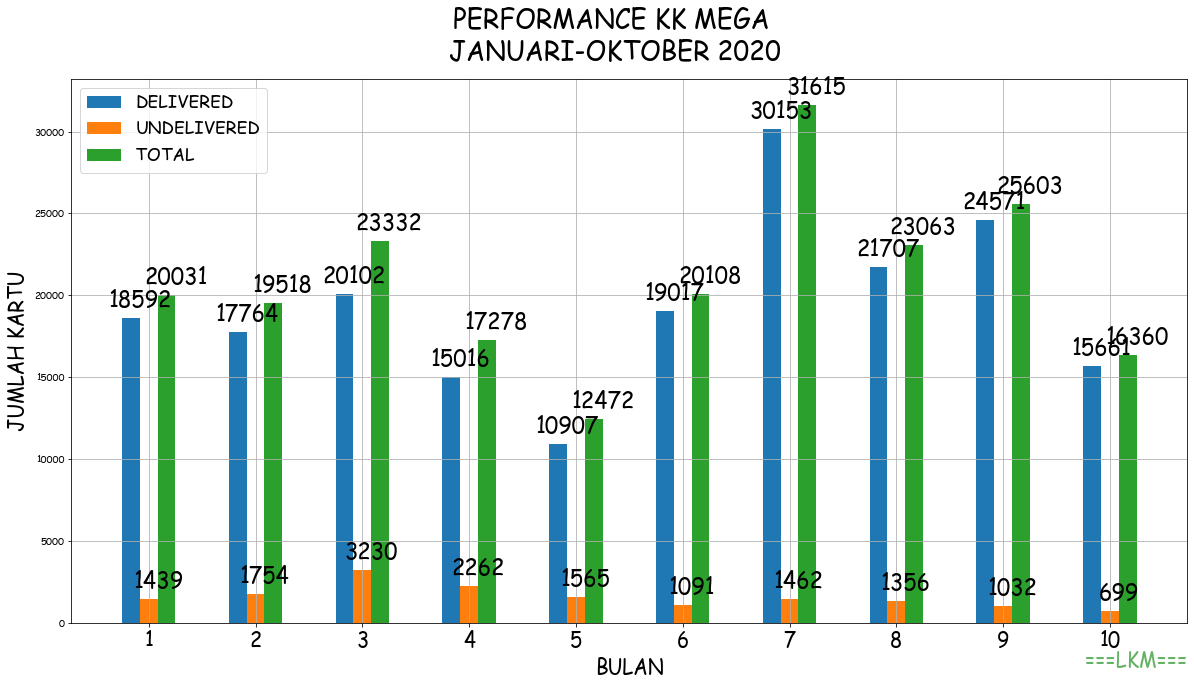

In [34]:
# ALL   CEK_SUM   percentage

# fontsize
plt.rcParams['font.sans-serif'] = "Comic Sans MS"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"


# ganti dataframeeeee!!
ax = CEK_SUM.plot(kind='bar', figsize=(20,10))
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), 
                                 (p.get_x()+p.get_width()/2., p.get_height()), ha='center', 
                                 va='center', xytext=(9, 17), textcoords='offset points', 
                                fontsize = 22)

ax.color=['r','b', 'g']
ax.autoscale(enable=True, axis='both', tight=False)

plt.suptitle('PERFORMANCE \n JANUARI-OKTOBER 2020', fontsize=26)
# ax.plot(figsize=(70,30))
ax.grid()
plt.xlabel('BULAN', fontsize=20)
plt.ylabel('JUMLAH KARTU', fontsize=20)
plt.xticks(rotation='horizontal', fontsize = 20)
# plt.legend(loc='center right', fontsize = 'xx-large')

# FOR CEK_SUM LEGEND
plt.legend(loc='upper left', fontsize = 'xx-large')

ax.text(1, -0.05, '===LKM===', transform=ax.transAxes,
        fontsize=20, color='green', alpha=0.6,
        ha='right', va='top', rotation='0')
 
# 'top', 'bottom', 'center', 'baseline', 'center_baseline'

# upper right
# 	upper left
# 	lower left
# 	lower right
# 	right
# 	center left
# 	center right
# 	lower center
# 	upper center
# 	center
# always put savefig BEFORE plt.show to enable the picture generator
# medium
# large
# x-large
# xx-large

# plt.rcParams["font.cursive"] = "Textile"

plt.savefig(os.path.join('percentage font style CEK_SUM 25NOV.png'), dpi=400, format='png') # use format='svg' or 'pdf' for vectorial pictures

plt.show()

# cek font
# http://jonathansoma.com/lede/data-studio/matplotlib/changing-fonts-in-matplotlib/
# https://stackoverflow.com/questions/21321670/how-to-change-fonts-in-matplotlib-python

In [ ]:


plt.show()

## Percentage

In [ ]:
# ============================================================================================================

## Differentiate Colour Bar chart

In [ ]:
import matplotlib.patches as patches

In [ ]:
perform_dlvrd['com'] = perform_dlvrd['%DELIV'].astype(str)+ '-' + perform_dlvrd['TLC Tujuan']
perform_dlvrd['com']

In [ ]:
# x = perform_dfx_oke.loc[:, ['B', 'T','%DELIV','%UNDELIV', 'TOTAL']]


# x = x[x['TLC Tujuan']!='']
# x = x.set_index('com')
xlab = perform_dfx_oke['BulanInt']
# ylab = x['%DELIV']
ylab = perform_dfx_oke['TOTAL']

In [ ]:
ylab

In [ ]:
#fix modifikasi jgn diubah, jk mau ubah use tab baru!!!!!!
#https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh

import os
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (30, 14))
ax = fig.add_subplot()

for x_, y_ in zip(xlab, ylab):
    ax.barh(x_, y_, color="red" if x_ < 20000.0 else 'green', alpha = 0.3)    
    

#fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(xlab))  # the x locations for the groups
ax.barh(ind, ylab, width, color="blue")
ax.figsize = (28, 14)
ax.set_yticks(ind+width/2)
#ax.set_yticks(ind)
ax.set_yticklabels(ylab, minor=False)
for i, v in enumerate(ylab):
    ax.text(v, i, " "+str(v), color='k', va='center', fontweight='bold')

plt.title('''PERSENTASE SUKSES MEGA\n PERIODE 1-30''', fontsize=18)
plt.xlabel('RANGE PERCENTAGE', fontsize=14)
plt.ylabel('LIST OF TLC', fontsize=14)
plt.grid()
plt.show()
# plt.savefig(os.path.join('test.png'), dpi=600, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

#plt.savefig('tes.jpg', dpi = 500)

In [ ]:
perform_dfx_oke[['B', 'T', '%DELIV', '%UNDELIV', 'TOTAL']].head()

## Put Annotation on chart

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
ax = tes.loc[:, ['Jumlah', 'DELIVERED', 'UNDELIVERED']].plot(kind='bar',figsize=(13,6));
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(), decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center', 
                va='center', 
                xytext=(2, 6), 
                textcoords='offset points');
plt.ylabel('JUMLAH PICKUP', fontsize=12);
plt.title('\nSUMMARY DELIVERY MEGA 1-7 2020\n', fontsize=15);
plt.xticks(rotation='horizontal');
plt.grid();



# Auto Export

## Export based on name

In [ ]:
# https://stackoverflow.com/questions/42918790/python-how-to-save-csv-files-with-different-file-names

jsb = df[df['TLC Tujuan']=='JSB'][['awb','TLC Tujuan', 'Status POD','Proses Terakhir']]
jsa = df[df['TLC Tujuan']=='JSA'][['awb','TLC Tujuan', 'Status POD','Proses Terakhir']]
jku = df[df['TLC Tujuan']=='JKU'][['awb','TLC Tujuan', 'Status POD','Proses Terakhir']]

df_list = [jsb, jsa, jku]

In [ ]:

df_list=[niaga, mega]

for df in df_list:
    os.chdir(r'C:\Users\LENOVO\Documents\PANTAU PERFORMA')
    #get the id and recordDay values from each df
    df_tlc=df['TLC Tujuan'].iloc[0]
    #df_record_day=df['recordDay'].iloc[0]

    #generate a unique file name based on the id and record
    file_name="TLC"+"_" +str(df_tlc)+".xlsx"

    #create the CSV
    
    df.to_excel(file_name, index = False)


In [ ]:
# https://stackoverflow.com/questions/33742588/pandas-split-dataframe-by-column-value

df_list=[op]  #??? iter all TLC to divide into several df

for df in df_list:
    
    #get the id and recordDay values from each df
    df_tlc=op['TLC Tujuan'].value_counts().index.to_list()
    #df_record_day=df['recordDay'].iloc[0]
    for tlc in df_tlc:
        file_name="TLC"+"_" +str(tlc)+".csv"
        df.to_csv(file_name, index = False)
    #generate a unique file name based on the id and record
    

    #create the CSV
    


In [ ]:
def tes(df):
    tes2 = df['TLC Tujuan'].unique()
    for i in tes2:
        tes1 = df.loc[df['TLC Tujuan']== i, 'tlcxx'] = i
        return(tes1)
tes()


## Sum() Every Columns Per Sheets?

In [ ]:
#SUM() EVERY COLUMNS PER SHEETS!!

import pandas as pd

sheets_dict = pd.read_excel('Book1.xlsx', sheetname=None)

full_table = pd.DataFrame()
for name, sheet in sheets_dict.items():
    sheet['sheet'] = name
    sheet = sheet.rename(columns=lambda x: x.split('\n')[-1])
    full_table = full_table.append(sheet)

full_table.reset_index(inplace=True, drop=True)

print full_table

# 